# Aula 4 (14/10/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

--- 

# Segmentação de imagens coloridas

Segmentação de imagens é um tópico muito estudado em visão computacional e se trata na realização de um mapa de segmentação que isole um objeto ou ROI de interesse. Isso pode ser feito tanto com processamento de imagens como com redes neurais.

A segmentação por cores é um dos métodos que podem ser utilizados. É mais intuitivo o uso do modelo de representação de cores Lab, pois separa os diferentes tipos de cores pelo HUE. Porém, melhores resultados são obtidos com o RGB.

Tentamos obter um intervalo que representa a cor que queremos usar para classificar o objeto, isso se resumo a encontrar um vetor no espectro RGB que tome como base a cor selecionada para segmentação. Com isso, é configurado uma distância euclidiana que vai representar o intervalo aceitável.

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [20]:
# Tipos de modelos de representação de cores presentes no Opencv
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags[0:20])

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA']


## Segmentação por espaço de cores
Se trata em definir manualmente o intervalo de cor desejada para a segmentação. Logo em seguida, realizar uma máscara Bitwise-AND.

### HSV

O sistema **HSV**, ou **HSB**, é descrito em **H**ue, **S**aturation e **V**alue/**B**rightness. Ele se destaca pela facilidade de trocar de uma cor para outra alterando apenas um valor, o que facilita o entendimento do processo. Uma cor com valor ou brilho máximo é análogo a utilizar uma luz puramente branca em um objeto colorido.

![HSV Cylinder](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/1200px-HSV_color_solid_cylinder.png?20151228061406)

Por conta da falta do sistema HSI no opencv, HSV foi utilizado.

In [21]:
# TODO: Pesquisar forma automática de identificar máscaras em uma imagem com slider

# HSV:

img = cv2.imread('images\\garrafa.jpeg')
img = cv2.medianBlur(img, 5) # Filtro na imagem para diminuir ruído
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Para HSV


# Intervalo de cor em hsv para ser usada na máscara 
lowerLimit_hsv = (30, 25, 70)
upperLimit_hsv = (89, 255, 255)

# Realizar um Threshold na imagem hsv para obter apenas a cor desejada
mask_hsv = cv2.inRange(img_hsv, lowerLimit_hsv, upperLimit_hsv)
kernel = np.ones((11,11), np.uint8)

# Dilatar e corroer a imagem como forma de considerar porções ignoradas da máscara
mask_hsv = cv2.dilate(mask_hsv, kernel)
mask_hsv = cv2.erode(mask_hsv, kernel)

# Operação lógica entre as imagens para excluir tudo que não é a máscara na imagem
img_segmented_hsv = cv2.bitwise_and(img, img, mask = mask_hsv)

### BGR

O sistema RBG é muito conhecido e é representado por um cubo que varia em 3 eixos: **B**lue, **G**reen e **R**ed.
![RBG Cube](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/RGB_color_solid_cube.png/1200px-RGB_color_solid_cube.png?20220517133701)

In [64]:
#BGR:

# Converter o valor dos limites para unsigned int
green_light_hsv = np.uint8([[[lowerLimit_hsv[0], lowerLimit_hsv[1], lowerLimit_hsv[2]]]])
green_dark_hsv = np.uint8([[[upperLimit_hsv[0], upperLimit_hsv[1], upperLimit_hsv[2]]]])

# Intervalo de cor em BGR para ser usada na máscara 
lowerLimit_BGR = cv2.cvtColor(green_light_hsv, cv2.COLOR_HSV2BGR)
upperLimit_BGR = cv2.cvtColor(green_dark_hsv, cv2.COLOR_HSV2BGR)

# Realizar um Threshold na imagem hsv para obter apenas a cor desejada
mask_BGR = cv2.inRange(img, lowerLimit_BGR, upperLimit_BGR)
kernel = np.ones((11,11), np.uint8)

# Dilatar e corroer a imagem como forma de considerar porções ignoradas da máscara
mask_BGR = cv2.dilate(mask_BGR, kernel)
mask_BGR = cv2.erode(mask_BGR, kernel)

# Operação lógica entre as imagens para excluir tudo que não é a máscara na imagem
img_segmented_BGR = cv2.bitwise_and(img, img, mask = mask_BGR)

### Lab
O espaço de cores CIELAB, ou L*a*b*, expressa a cor em 3 diferentes formas. O L* representa a porcentagem de Lightness, enquanto a* e b* cores únicas da visão humana: amarelo, vermelho, verde e azul. Lab tem a vantagem de ser mais perceptivamente linear que outros espaços de cores, o que significa que uma mudança de um valor produz uma mudança de percepção igualmente importante.

![CIELAB](https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/CIELAB_color_space_top_view.png/932px-CIELAB_color_space_top_view.png)

In [65]:
#Lab:

# Converter imagem original para Lab
img_Lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) 

# Intervalo de cor em BGR para ser usada na máscara 
lowerLimit_Lab = cv2.cvtColor(lowerLimit_BGR, cv2.COLOR_BGR2Lab)
upperLimit_Lab = cv2.cvtColor(upperLimit_BGR, cv2.COLOR_BGR2Lab)

# Realizar um Threshold na imagem Lab para obter apenas a cor desejada
mask_Lab = cv2.inRange(img_Lab, lowerLimit_Lab, upperLimit_Lab)
kernel = np.ones((11,11), np.uint8)

# Dilatar e corroer a imagem como forma de considerar porções ignoradas da máscara
mask_Lab = cv2.dilate(mask_Lab, kernel)
mask_Lab = cv2.erode(mask_Lab, kernel)

# Operação lógica entre as imagens para excluir tudo que não é a máscara na imagem
img_segmented_Lab = cv2.bitwise_and(img, img, mask = mask_Lab)

## Teste da Segmentação por espaço de cores

A seguir está demonstrado a identificação de uma garrafa com 3 diferentes espaços de cor. sendo que de uma para outra, apenas foi convertido os valor para os devidos espaços, através do comando `cv2.COLOR_XXX2XXX`.   

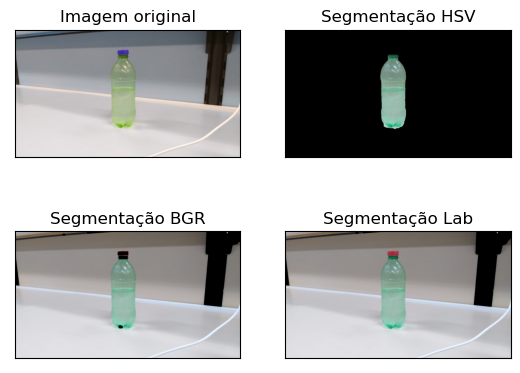

In [72]:
# Converter imagem original para BGR
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Plotar todos os resultados
titles = ['Imagem original', 'Segmentação HSV', 'Segmentação BGR', 'Segmentação Lab']
images = [img_RGB, img_segmented_hsv, img_segmented_BGR, img_segmented_Lab]
for i in range(4):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  plt.subplot(2,2,i+1),plt.imshow(images[i])
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### Conclusões

Alterar o espaço de cores também altera o resultado da segmentação. O espaço hsv teve o melhor resultado.